# Regularization I : Lasso

Lasso can be used for feature selection from data set.

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso

In [2]:
# Reading data
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [3]:
df.drop(['Region'], inplace=True, axis=1)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


In [5]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [6]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


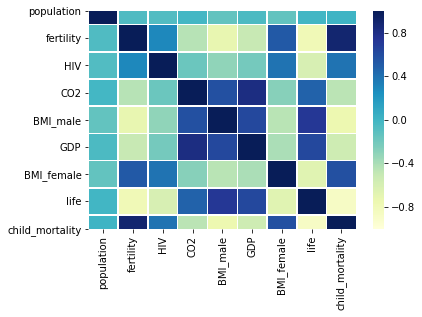

In [7]:
sns.heatmap(df.corr(), vmin=-1,vmax=1, linewidths=0.5, cmap="YlGnBu")

In [8]:
# features and labels
X = df.drop(['life'], axis=1).values
y = df['life'].values

In [9]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

In [10]:
# Fit the regressor to the data
lasso.fit(X, y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [11]:
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


In [12]:
df_columns = df.columns.drop(['life'])
df_columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

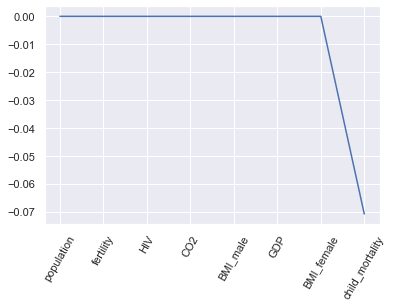

In [13]:
# Plot the coefficients
sns.set()
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.show()

# Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be our first choice.

In [14]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [15]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [16]:
# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

In [17]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [18]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

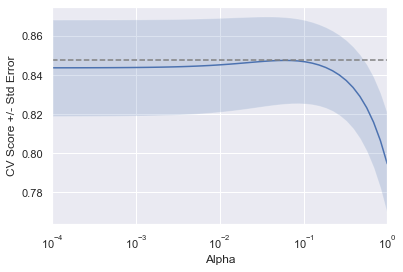

In [19]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)